<a href="https://colab.research.google.com/github/Thanakorn2717/Data_Analytics_US_Fatalites_Analysis_Python/blob/main/Fatal_Force_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 126.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
display(df_hh_income.shape)
display(df_pct_poverty.shape)
display(df_pct_completed_hs.shape)
display(df_share_race_city.shape)
display(df_fatalities.shape)

(29322, 3)

(29329, 3)

(29329, 5)

(29268, 7)

(2535, 14)

In [ ]:
display(df_hh_income.duplicated().any())
display(df_pct_poverty.duplicated().any())
display(df_pct_completed_hs.duplicated().any())
display(df_share_race_city.duplicated().any())
display(df_fatalities.duplicated().any())

False

False

False

False

False

In [ ]:
display(df_hh_income.isnull().sum())
display(df_pct_poverty.isnull().sum())
display(df_pct_completed_hs.isnull().sum())
display(df_share_race_city.isnull().sum())
display(df_fatalities.isnull().sum())

,0
Geographic Area,0
City,0
Median Income,51


,0
Geographic Area,0
City,0
poverty_rate,0


,0
Geographic Area,0
City,0
percent_completed_hs,0
Unnamed: 3,1
Unnamed: 4,0


,0
Geographic area,0
City,0
share_white,0
share_black,0
share_native_american,0
share_asian,0
share_hispanic,0


,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


In [ ]:
df_share_race_city.rename(columns={'Geographic area': 'state', 'City':'city'}, inplace=True)
df_hh_income.rename(columns={'Geographic Area': 'state', 'City':'city'}, inplace=True)
df_pct_poverty.rename(columns={'Geographic Area': 'state', 'City':'city'}, inplace=True)
df_pct_completed_hs.rename(columns={'Geographic Area': 'state', 'City':'city'}, inplace=True)

## Data Cleaning - Check for Missing Values, Duplicates, and Incorrect values


In [ ]:
#(1.) "Median Income" from df_hh_income table
#This column contain many incorrect values such as null, "(X)", "-", "2500-", "250,000+"  Let's handle each of them.
income_error_1 = df_hh_income[df_hh_income["Median Income"] == "250,000+"]
display(income_error_1["Median Income"].value_counts())

income_error_2 = df_hh_income[df_hh_income["Median Income"] == "2,500-"]
display(income_error_2["Median Income"].value_counts())

income_error_3 = df_hh_income[df_hh_income["Median Income"] == "(X)"]
display(income_error_3["Median Income"].value_counts())

income_error_4 = df_hh_income[df_hh_income["Median Income"] == "-"]
display(income_error_4["Median Income"].value_counts())

income_error_5 = df_hh_income["Median Income"].isnull().sum()
display(income_error_5)

,count
Median Income,
"250,000+",24


,count
Median Income,
"2,500-",9


,count
Median Income,
(X),1113


,count
Median Income,
-,740


51

In [ ]:
#(1.) "Median Income" from df_hh_income table
# Let check randomness for each of them.

display(income_error_1["state"].value_counts()) #250,000+
display(income_error_2["state"].value_counts()) #2,500-
display(income_error_3["state"].value_counts()) #(X)
display(income_error_4["state"].value_counts()) #"-"
display(df_hh_income[df_hh_income["state"].isnull()]) #null

,count
state,
MD,5
CA,4
NY,3
FL,2
TX,2
GA,1
IN,1
KS,1
KY,1


,count
state,
SC,2
TX,2
AZ,1
CA,1
KS,1
OK,1
WV,1


,count
state,
CA,95
TX,87
NM,65
PA,42
OK,38
WV,37
OH,37
ND,37
AZ,35


,count
state,
TX,115
CA,73
NM,61
AK,52
AZ,43
MO,27
SD,26
MD,26
CO,24


,state,city,Median Income


In [ ]:
#(1.) "Median Income" from df_hh_income table
#Finally, we have 3 groups of incorrect income value. They will have their own solution.

# 1. "250,000+", "2,500-"
#These incorrect values have only 33 rows. Let's remove them.
df_hh_income.drop(df_hh_income[df_hh_income["Median Income"] == "250,000+"].index, inplace=True)
df_hh_income.drop(df_hh_income[df_hh_income["Median Income"] == "2,500-"].index, inplace=True)

# 2. "(X)", "-"
#These incorrect values have almost 2000 rows. It's almost 10% of dataset.
#Anyway, they are randomness. let's impute them using global median.
display(df_hh_income[df_hh_income["Median Income"] == 0]) # Ensure that there is no 0 values.
#Transform to 0 so that we can convert from str to float for matematical operation.
df_hh_income[df_hh_income["Median Income"] == "(X)"] = 0
df_hh_income[df_hh_income["Median Income"] == "-"] = 0
df_hh_income["Median Income"] = df_hh_income["Median Income"].astype(float)
# Replace rows where "Median Income" is 0 with the median value of the column
median_value = df_hh_income["Median Income"].median()
df_hh_income.loc[df_hh_income["Median Income"] == 0, "Median Income"] = median_value

# 3. null values
# You might have seen that all nulls values are related to "WY" state.
# In my opinion, the best choice is imputing them using WY's median.
WY_median_value = df_hh_income[df_hh_income["state"] == "WY"]["Median Income"].median()
df_hh_income.loc[(df_hh_income["state"] == "WY") & (df_hh_income["Median Income"].isnull()), "Median Income"] = WY_median_value

display(df_hh_income["Median Income"].isnull().sum())

,state,city,Median Income


0

In [ ]:
display(df_fatalities.isnull().sum())

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


In [ ]:
#(2.) "armed", "age", "race", "flee" columns from df_fatalities
#Let's remove rows that age column contain null values since there are only 3% in dataset.
df_fatalities.drop(df_fatalities[df_fatalities["age"].isnull()].index, inplace=True)
df_fatalities["age"] = df_fatalities["age"].astype(int)
display(df_fatalities["age"].value_counts())

#Let check the others as well
display(df_fatalities["armed"].value_counts())
display(df_fatalities["race"].value_counts())
display(df_fatalities["flee"].value_counts())

,count
age,
25,103
36,91
31,85
24,83
29,83
...,...
6,1
14,1
80,1


,count
armed,
gun,1356
knife,357
vehicle,172
unarmed,170
undetermined,112
...,...
hand torch,1
garden tool,1
pole,1


,count
race,
W,1192
B,609
H,413
A,38
N,31
O,28


,count
flee,
Not fleeing,1643
Car,374
Foot,288
Other,92


In [ ]:
#(2.) "armed", "age", "race", "flee" columns from df_fatalities
#For null values of "armed", "race", "flee", I decide to replace them with "Not identified"
df_fatalities.loc[(df_fatalities["armed"].isnull()) | (df_fatalities["race"].isnull()) | (df_fatalities["flee"].isnull()), ["armed", "race", "flee"]] = ["Not identified", "U", "Not identified"]

In [ ]:
display(df_fatalities.isnull().sum())
#No null values left. Let's analyse!

,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


In [ ]:
# (3.) Incorrect value in the other tables
#Let's join all info table together first

df_info = pd.merge(df_hh_income, df_pct_poverty, how='inner', on=['state', 'city'])
df_info = pd.merge(df_info, df_pct_completed_hs, how='inner', on=['state', 'city'])
df_info = pd.merge(df_info, df_share_race_city, how='inner', on=['state', 'city'])
df_info.drop(columns=["Unnamed: 3", "Unnamed: 4"], inplace=True)

df_info

,state,city,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,"11,207.00",78.8,21.2,67.2,30.2,0,0,1.6
1,AL,Abbeville city,"25,615.00",29.1,69.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,"42,575.00",25.5,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,"37,083.00",30.7,81.4,99.1,0.1,0,0.1,0.4
4,AL,Akron town,"21,667.00",42,68.6,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...
27256,WY,Woods Landing-Jelm CDP,"55,227.00",18.6,100,95.9,0,0,2.1,0
27257,WY,Worland city,"41,523.00",15.3,85.6,89.9,0.3,1.3,0.6,16.6
27258,WY,Wright town,"77,114.00",5.9,89.2,94.5,0.1,1.4,0.2,6.2
27259,WY,Yoder town,"37,500.00",5.4,79.4,97.4,0,0,0,4


In [ ]:
# (3.) Incorrect value in the other tables
#Remove all incorrect values
df_info.drop(df_info[(df_info['poverty_rate'] == "-") | (df_info['percent_completed_hs'] == "-")].index, inplace=True)
df_info.drop(df_info[(df_info['share_white'] == "(X)") | (df_info['share_black'] == "(X)") | (df_info['share_asian'] == "(X)") | (df_info['share_native_american'] == "(X)") | (df_info['share_hispanic'] == "(X)")].index, inplace=True)

df_info['poverty_rate'] = df_info['poverty_rate'].astype(float)
df_info['percent_completed_hs'] = df_info['percent_completed_hs'].astype(float)
df_info['share_white'] = df_info['share_white'].astype(float)
df_info['share_black'] = df_info['share_black'].astype(float)
df_info['share_native_american'] = df_info['share_native_american'].astype(float)
df_info['share_asian'] = df_info['share_asian'].astype(float)
df_info['share_hispanic'] = df_info['share_hispanic'].astype(float)

df_info

,state,city,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,"11,207.00",78.80,21.20,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,"25,615.00",29.10,69.10,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,"42,575.00",25.50,78.90,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,"37,083.00",30.70,81.40,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,"21,667.00",42.00,68.60,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...,...,...,...
27256,WY,Woods Landing-Jelm CDP,"55,227.00",18.60,100.00,95.90,0.00,0.00,2.10,0.00
27257,WY,Worland city,"41,523.00",15.30,85.60,89.90,0.30,1.30,0.60,16.60
27258,WY,Wright town,"77,114.00",5.90,89.20,94.50,0.10,1.40,0.20,6.20
27259,WY,Yoder town,"37,500.00",5.40,79.40,97.40,0.00,0.00,0.00,4.00


#Poverty Rate in each US State

Which state has the highest poverty rate? Which state has the lowest poverty rate?

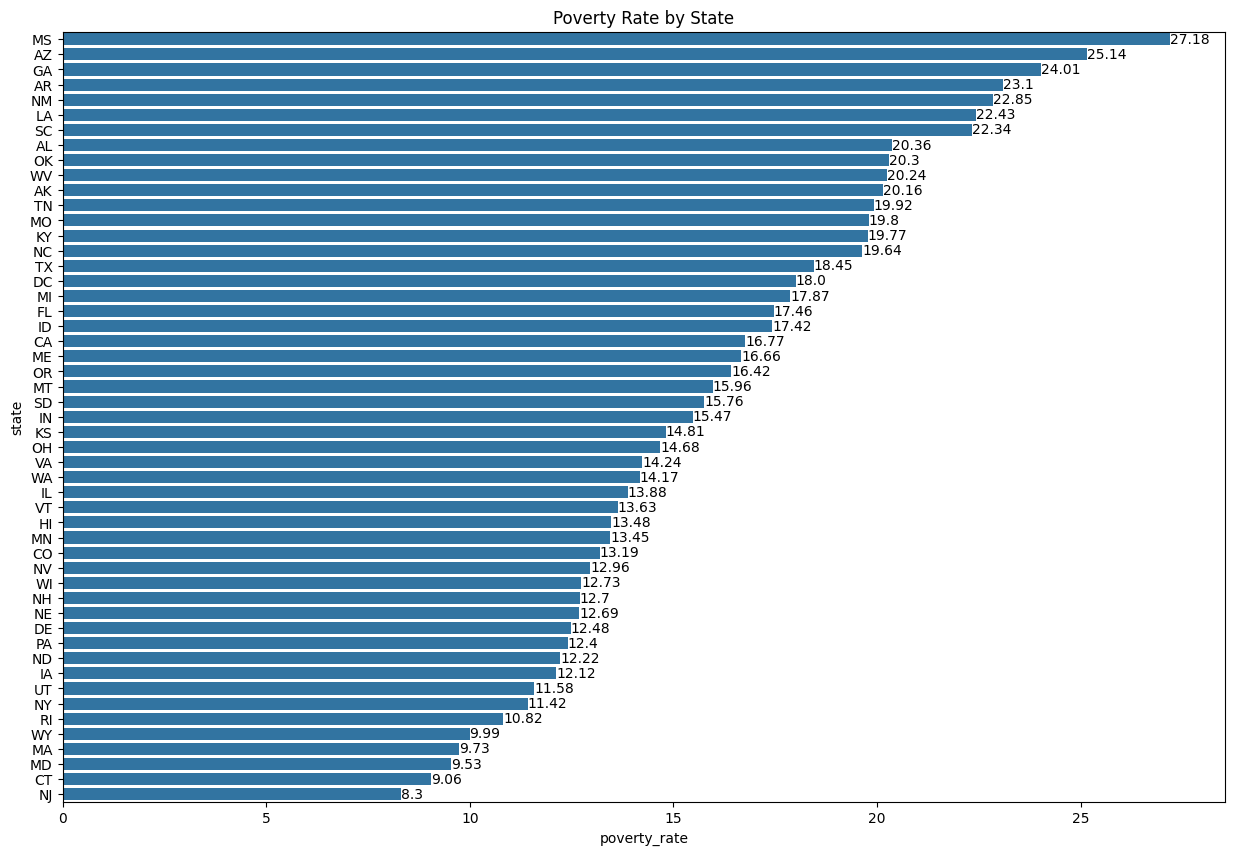

In [ ]:
df_poverty_rate = df_info.groupby('state')['poverty_rate'].mean().reset_index().sort_values("poverty_rate", ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(df_poverty_rate, x="poverty_rate", y="state")
for index, value in enumerate(df_poverty_rate['poverty_rate']):
    plt.text(value, index, str(round(value, 2)), va='center')
plt.title('Poverty Rate by State')
plt.show()

#High School Graduation Rate by US State

Which state has the lowest high school graduation rate? Which state has the highest?

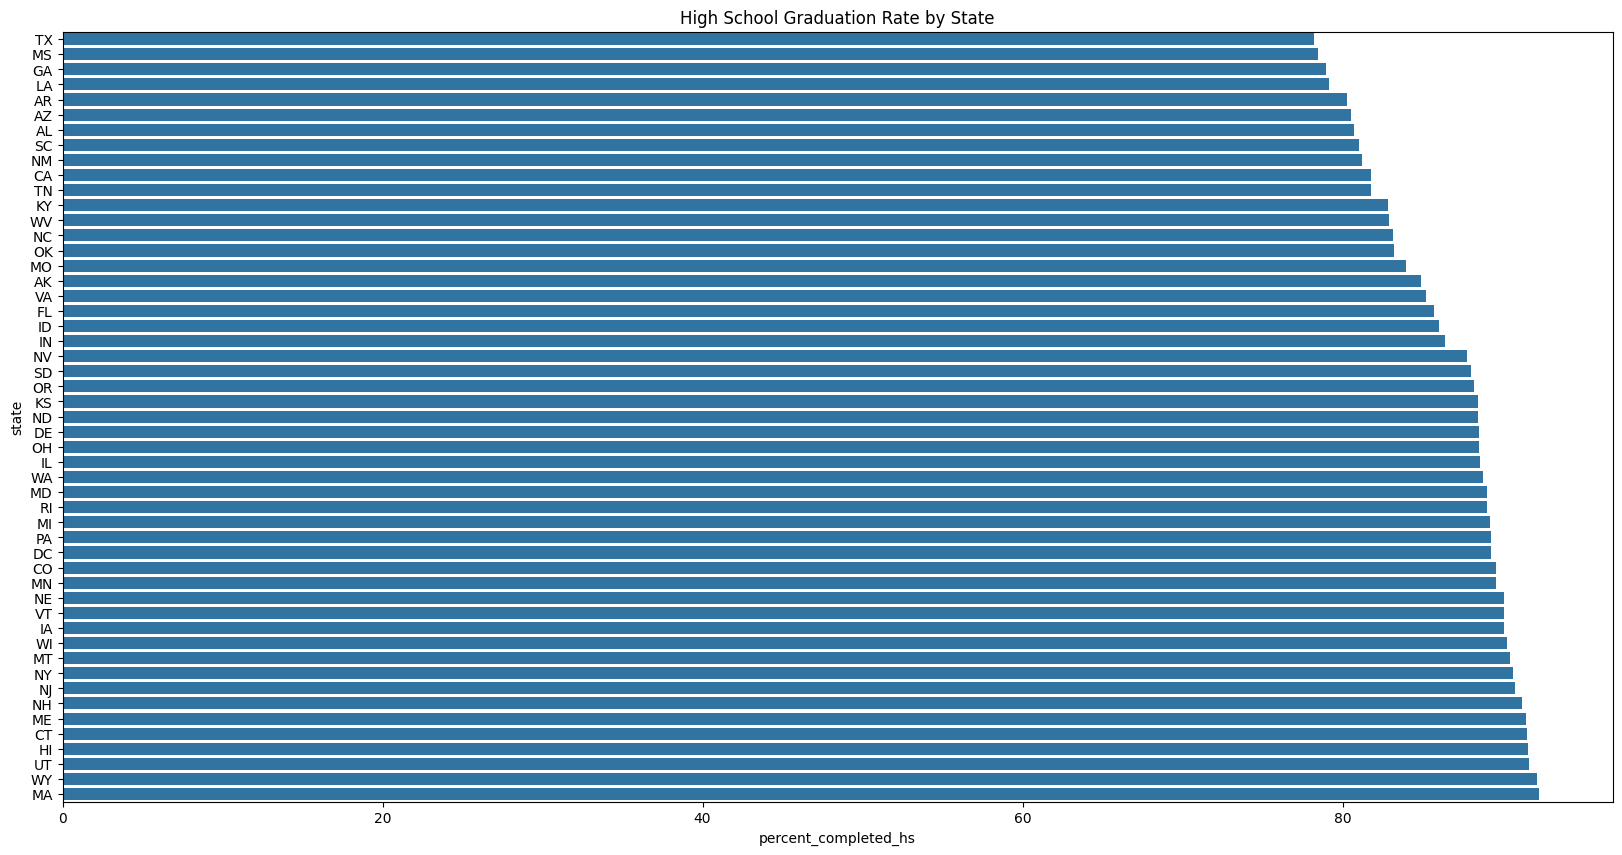

In [ ]:
hs_graduated_state = df_info.groupby('state')['percent_completed_hs'].mean().reset_index().sort_values('percent_completed_hs')

plt.figure(figsize=(20, 10))
sns.barplot(hs_graduated_state, x='percent_completed_hs', y='state')
plt.title('High School Graduation Rate by State')
plt.show()

#Relationship between Poverty Rates and High School Graduation Rates



In [ ]:
scatter = px.scatter(df_info,
                  x='poverty_rate',
                  y='percent_completed_hs',
                  title='Poverty Rates and High School Graduation Rates Relationship',
                  trendline='ols')

corr_coef = np.corrcoef(df_info["poverty_rate"], df_info["percent_completed_hs"])[0, 1]

scatter.update_layout(
    xaxis_title="Poverty rate (%)",
    yaxis_title="High school graduation rates (%)",
    annotations=[dict(
        x=max(df_info["poverty_rate"]),
        y=min(df_info["percent_completed_hs"]),
        text=f"Corr Coef: {corr_coef:.2f}",
        showarrow=False,
        font=dict(size=14, color="black")
    )]
)
scatter.data[1].update(line=dict(color="red"))  # Change trendline color to red
scatter.show()

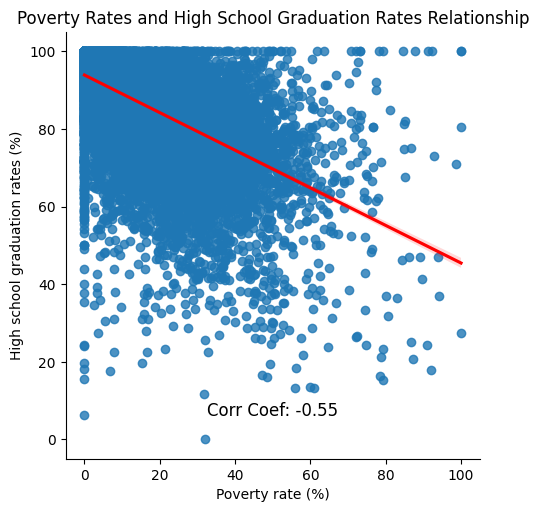

In [ ]:
sns.lmplot(
    df_info,
    x='poverty_rate',
    y='percent_completed_hs',
    line_kws={'color': 'red'})

corr_coef = np.corrcoef(df_info["poverty_rate"], df_info["percent_completed_hs"])[0, 1]

plt.annotate(
    f"Corr Coef: {corr_coef:.2f}",
    xy=(0.5, 0.1),
    xycoords='axes fraction',
    ha='center',
    fontsize=12,
    color='black')

plt.title('Poverty Rates and High School Graduation Rates Relationship')
plt.xlabel('Poverty rate (%)')
plt.ylabel('High school graduation rates (%)')
plt.show()

#Racial Makeup of Each US State


In [ ]:
df_ratial_makeup = df_info[["state", "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]]
df_ratial_makeup_melted = df_ratial_makeup.melt(id_vars="state",
                                                value_vars=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
                                                var_name="racial_group", value_name="percentage")

df_ratial_makeup_melted = df_ratial_makeup_melted.groupby(['state', 'racial_group'])['percentage'].mean().reset_index()

#Some rows add up each racial to more than 100%. That's not make sense.
#Let's normalize percentage to sum up = 100%.
percentage_on_state = df_ratial_makeup_melted.groupby('state')['percentage'].transform('sum')
df_ratial_makeup_melted['normalized_percentage'] = (df_ratial_makeup_melted['percentage']/percentage_on_state) * 100

bar = px.bar(
    df_ratial_makeup_melted,
    x='normalized_percentage',
    y='state',
    color='racial_group',
    barmode='stack',
)

bar.update_layout(
    xaxis_title='Percentage',
    yaxis_title='State',
    title="Racial Group Percentages Across States",
    legend_title="Racial Group",
    width=1500,
    height=1000
)

bar.show()

In [ ]:
df_ratial_makeup_melted

,state,racial_group,percentage,normalize_percentage
0,AK,share_asian,1.62,1.70
1,AK,share_black,0.61,0.64
2,AK,share_hispanic,2.09,2.19
3,AK,share_native_american,51.30,53.68
4,AK,share_white,39.94,41.79
...,...,...,...,...
250,WY,share_asian,0.37,0.36
251,WY,share_black,0.42,0.41
252,WY,share_hispanic,6.38,6.23
253,WY,share_native_american,3.33,3.25


#People Killed by Race


In [ ]:
df_fatalities['race'] = df_fatalities['race'].str.replace('W', 'White').str.replace('B', 'Black').str.replace('A', 'Asian').str.replace('H', 'Hispanic').str.replace('U', 'Unknown').str.replace('N', 'Native american').str.replace('O', 'Others')

killed_by_race = df_fatalities['race'].value_counts().reset_index()

donut = px.pie(labels=killed_by_race['race'],
values=killed_by_race["count"],
title="Fatalities by Racial Group",
names=killed_by_race['race'],
hole=0.6,
)
donut.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

donut.show()

#Total Number of Deaths of Men and Women


In [ ]:
killed_by_gender = df_fatalities['gender'].value_counts().reset_index()
killed_by_gender["gender"] = killed_by_gender["gender"].str.replace('M', 'Male').str.replace('F', 'Female')

pie = px.pie(
    labels=killed_by_gender['gender'],
    values=killed_by_gender["count"],
    title="Fatalities by Gender",
    names=killed_by_gender['gender']
    )

pie.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

pie.show()

#Distribution of Age and Manner of Death


In [ ]:
death_by_age = df_fatalities[["manner_of_death", "age"]]

box = px.box(
    death_by_age,
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title='Age by Manner of Death'
)

box.update_layout(
    xaxis_title="Manner of Death",
    yaxis_title="Age"
)

box.show()

The youngest death is 6-years-old boy "Jeremy Mardis". He was accidentally shot by police because they tried to stop his father car by shooting when he was in that car as well. He was only the innocent boy.

Ciara Meyer was a 12-year-old girl who was accidentally shot by police after her father drew a gun when the police arrived to forcibly evict her family from their apartment for being behind on rent.

Jordan Edwards is 15-years-old boy that was accidentally shot by polices because they misunderstood that he and his friend are suspects.

Jesse James Romero is 14-years-old boy that was shot by polices because they cited that he tried to draw a gun when he was escaping arrest in a case of spraying graffiti in public.

Tyre King is 13-years-old boy. He was shot by police when escaping arrest in a case of rob and he drew a gun. However, the gun is airsoft gun.

# Were People Armed?
How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
armed_proportion = df_fatalities['armed'].value_counts(normalize=True).reset_index()
armed_others = armed_proportion['armed'].to_list()
armed_others = armed_others [2:3] + armed_others[6:]

top_armed = df_fatalities['armed'].value_counts().reset_index()
top_armed.loc[top_armed['armed'].isin(armed_others), 'armed'] = "others"
top_armed = top_armed.groupby('armed')['count'].sum().reset_index().sort_values('count', ascending=False)
row_to_move = top_armed[top_armed['armed'] == 'others']
top_armed = top_armed.drop(row_to_move.index)
top_armed = pd.concat([top_armed, row_to_move], ignore_index=True)

bar = px.bar(
    top_armed,
    x='armed',
    y='count',
    color='armed',
    title='Weapon on hand comparison',
    text_auto=True
)

bar.update_layout(
    xaxis_title="Weapon",
    yaxis_title="Number of fatalities"
)

bar.show()

# How Old Were the People Killed?

People killed under 25 years old.  

In [ ]:
age_ratio = df_fatalities['age'].value_counts().reset_index()
age_ratio.columns = ['age', 'number_of_people']
age_ratio.loc[age_ratio['age'] < 25, 'age'] = 'Under 25'
age_ratio.loc[age_ratio['age'] != 'Under 25', 'age'] = '25+'
age_ratio = age_ratio.groupby('age')['number_of_people'].sum().reset_index().sort_values('number_of_people')

bar = px.bar(
    age_ratio,
    x='age',
    y='number_of_people',
    color='age',
    title='Fatalities by Age Group',
    text_auto=True
)

bar.update_layout(
    xaxis_title="Age",
    yaxis_title="Number of fatalities"
)

bar.show()

<ipython-input-39-ac7a1f478131>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Under 25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



#Distribution of ages of the people killed by police.

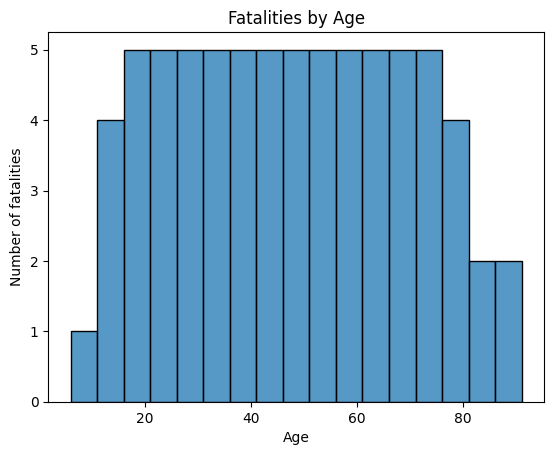

In [ ]:
age = df_fatalities['age'].value_counts().reset_index()
age.columns = ['age', 'number_of_people']

sns.histplot(
    age,
    x='age',
    binwidth=5
)
plt.title('Fatalities by Age')
plt.xlabel('Age')
plt.ylabel('Number of fatalities')
plt.show()

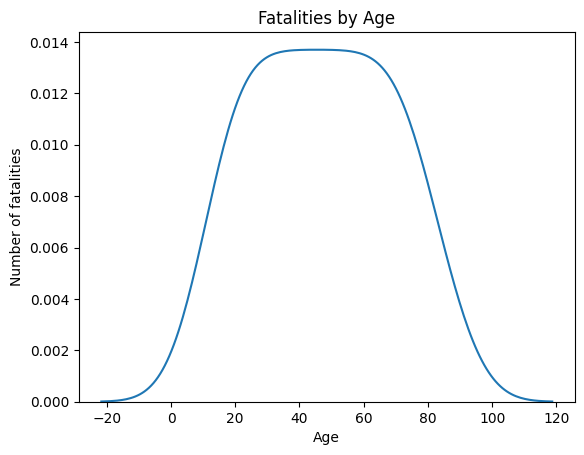

In [ ]:
sns.kdeplot(
    age,
    x='age',
)
plt.title('Fatalities by Age')
plt.xlabel('Age')
plt.ylabel("Number of fatalities")
plt.show()

KDE plot for each race.

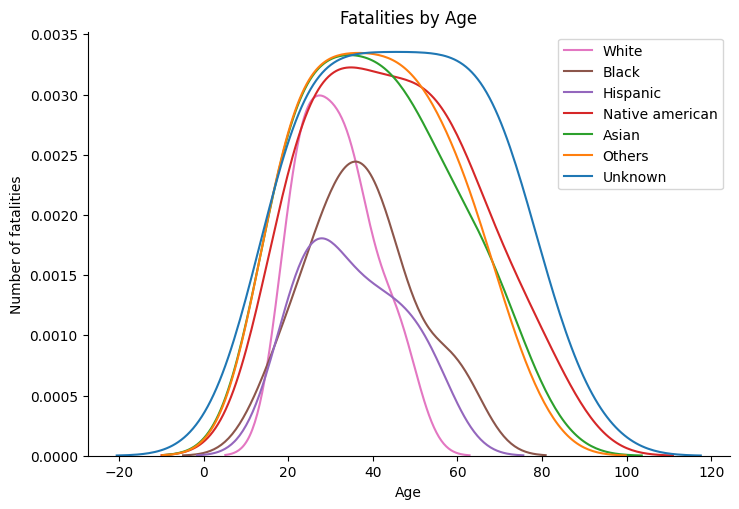

In [ ]:
age_by_race = df_fatalities[['race', 'age']].value_counts().reset_index()
age_by_race.columns = ['race', 'age', 'number_of_people']
row_to_move = age_by_race[age_by_race['race'] == "Not identified"]
age_by_race = age_by_race.drop(row_to_move.index)
age_by_race = pd.concat([age_by_race,row_to_move], ignore_index=True)

sns.displot(
    age_by_race,
    x="age",
    kind="kde",
    hue="race",
    height=5,
    aspect=1.5,
    legend=None
)
order = ['White', 'Black', 'Hispanic', 'Native american', 'Asian', 'Others', 'Unknown']
plt.legend(order)
plt.title('Fatalities by Age')
plt.xlabel('Age')
plt.ylabel("Number of fatalities")
plt.show()

# Race of People Killed

Total number of people killed by race.

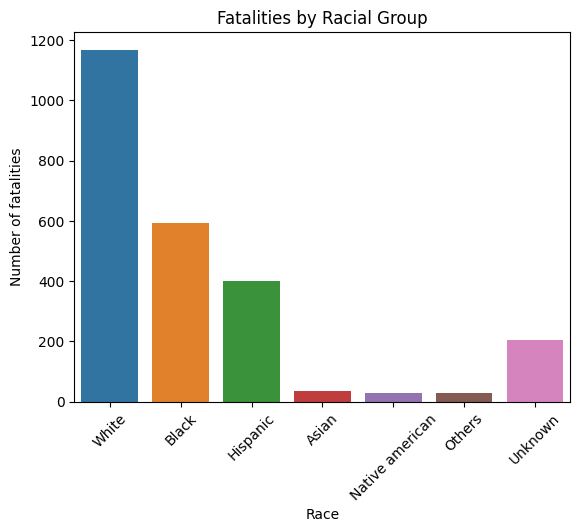

In [ ]:
killed_by_race = df_fatalities['race'].value_counts().reset_index()
row_to_move = killed_by_race[killed_by_race['race'] == 'Unknown']
killed_by_race = killed_by_race.drop(row_to_move.index)
killed_by_race = pd.concat([killed_by_race, row_to_move])
killed_by_race

sns.barplot(
    killed_by_race,
    x='race',
    y='count',
    hue='race'
)
plt.xticks(rotation=45)
plt.title('Fatalities by Racial Group')
plt.xlabel('Race')
plt.ylabel("Number of fatalities")
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts().reset_index()

donut = px.pie(
    mental_illness,
    labels = mental_illness['signs_of_mental_illness'],
    values = mental_illness['count'],
    title="Proportion of People Killed Who Had Mental Illness",
    names= mental_illness['signs_of_mental_illness'],
    hole=0.6
)
donut.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
donut.show()

# In Which Cities Do the Most Police Killings Take Place?

Top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10_cities = df_fatalities['city'].value_counts().head(10).reset_index()
top_10_cities.columns = ['city', 'fatalities']

bar = px.bar(
    top_10_cities,
    x = 'fatalities',
    y = 'city',
    color = 'city'
)

bar.update_layout(
    xaxis_title = 'Number of fatalities',
    yaxis_title = 'Cities',
    title='Fatalities in the Top 10 Cities'
)

bar.show()

# Rate of Death by Race


In [ ]:
top_10_cities_list = top_10_cities['city'].to_list()
top_10_cities_list

df_share_race_city = df_share_race_city[['city', 'share_white',	'share_black',	'share_native_american',	'share_asian', 'share_hispanic']]
rows_city = df_share_race_city['city'].str.contains("city", case=False, na=False)

df_share_race_city = df_share_race_city[rows_city ]
df_share_race_city = df_share_race_city[['city', 'share_white',	'share_black',	'share_native_american',	'share_asian', 'share_hispanic']]
df_share_race_city_melted = df_share_race_city.melt(id_vars='city', value_vars=['share_white',	'share_black',	'share_native_american',	'share_asian',  'share_hispanic'],
                                                    var_name='racial_group', value_name="percentage")

df_share_race_city_melted['city'] = df_share_race_city_melted['city'].str.replace("city", "",  case=False).str.strip()

top_10_cities_racial = df_share_race_city_melted[df_share_race_city_melted['city'].isin(top_10_cities_list)]
top_10_cities_racial = top_10_cities_racial.merge(top_10_cities, on='city', how='left')
top_10_cities_racial.columns = ['city', 'racial_group', 'percentage', 'total_fatalities']
top_10_cities_racial['percentage'] = pd.to_numeric(top_10_cities_racial['percentage'], errors='coerce')
top_10_cities_racial['total_fatalities'] = pd.to_numeric(top_10_cities_racial['total_fatalities'], errors='coerce')
top_10_cities_racial = top_10_cities_racial.groupby(['city', 'racial_group'])[['percentage', 'total_fatalities']].mean().reset_index()
top_10_cities_racial['total_fatalities'] = top_10_cities_racial['total_fatalities'].round().astype(int)

#Some rows add up each racial to more than 100%. That's not make sense.
#Let's normalize percentage to sum up = 100%.
total_percentage_per_city = top_10_cities_racial.groupby('city')['percentage'].transform('sum')
top_10_cities_racial['normalized_percentage'] = (top_10_cities_racial['percentage'] / total_percentage_per_city) * 100
top_10_cities_racial['fatalities'] = (top_10_cities_racial['normalized_percentage'] * top_10_cities_racial['total_fatalities']) / 100
top_10_cities_racial = top_10_cities_racial.sort_values(['total_fatalities'])

bar = px.bar(
    top_10_cities_racial,
    x='fatalities',
    y='city',
    color='racial_group',
    barmode='stack',
)

bar.update_layout(
    xaxis_title='Number of Fatalities',
    yaxis_title='City',
    title="Estimated Racial Group Fatalities in the Top 10 Cities",
    legend_title="Racial Group"
)

bar.show()

In [ ]:
top_10_cities_racial

,city,racial_group,percentage,total_fatalities,normalized_percentage,fatalities
49,St. Louis,share_white,55.80,15,54.95,8.24
47,St. Louis,share_hispanic,4.60,15,4.53,0.68
46,St. Louis,share_black,39.15,15,38.55,5.78
45,St. Louis,share_asian,1.55,15,1.53,0.23
48,St. Louis,share_native_american,0.45,15,0.44,0.07
34,Miami,share_white,83.33,18,72.68,13.08
33,Miami,share_native_american,4.48,18,3.90,0.70
32,Miami,share_hispanic,21.10,18,18.40,3.31
31,Miami,share_black,5.33,18,4.64,0.84
30,Miami,share_asian,0.42,18,0.37,0.07


#Police Killings by US State

Which states are the most dangerous? Are these the same states with high degrees of poverty?

In [ ]:
police_killings_by_state = df_fatalities['state'].value_counts().reset_index()

state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

police_killings_by_state['state_fullname'] = police_killings_by_state['state'].map(state_abbreviations)

map = px.choropleth(
    police_killings_by_state,
    locations='state',
    color='count',
    hover_name='state_fullname',
    color_continuous_scale=px.colors.sequential.matter,
    locationmode='USA-states'
)
map.update_layout(coloraxis_showscale=True,
                  title="Number of Fatalities by State")
map.show()

# Number of Police Killings Over Time


In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['year_quarter'] = df_fatalities['date'].dt.to_period('Q')
df_fatalities['year_quarter'] = df_fatalities['year_quarter'].astype(str)
fatalities_overtime = df_fatalities.groupby('year_quarter').size().reset_index(name='count')
#for this case, groupby().size() is identical to .value_counts()

line = px.line(
    fatalities_overtime,
    x='year_quarter',
    y='count'
)
line.update_layout(
    title='Trends in US Police Killings Fatalities Over Time',
    xaxis_title='Year and Quarter',
    yaxis_title='Number of Fatalities',
    xaxis={'type': 'category'},
    yaxis={'range': [0, fatalities_overtime['count'].max()]}
)
line.show()


In [ ]:
fatalities_overtime

,year_quarter,count
0,2015Q1,235
1,2015Q2,241
2,2015Q3,261
3,2015Q4,254
4,2016Q1,253
5,2016Q2,247
6,2016Q3,228
7,2016Q4,235
8,2017Q1,218
9,2017Q2,194
